In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

A dataframe was created.

In [2]:
column_names = ['Cities', 'Borough']

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Upload the data from downloaded Json file.

In [3]:
with open('istanbul.json') as json_file:
    turkey = json.load(json_file)

In this json file there are all the cities from Turkey with their boroughs.
later on the data clearing started.

In [4]:
for data in turkey['features']:
    cities = data['properties']["name_1"]
    Borough = data['properties']["name_2"]


    neighborhoods = neighborhoods.append({'Cities': cities,
                                          'Borough': Borough,
                                          }, ignore_index=True)


We have reduced the data to only Istanbul using the above codes.

In [5]:
Istanbul = neighborhoods.loc[neighborhoods.Cities == 'Istanbul']
print((Istanbul))


       Cities        Borough
428  Istanbul        Çatalca
429  Istanbul       Çekmekoy
430  Istanbul         Adalar
431  Istanbul       Ümraniye
432  Istanbul        Üsküdar
433  Istanbul     Arnavutkoy
434  Istanbul       Atasehir
435  Istanbul        Avcılar
436  Istanbul          Şişli
437  Istanbul           Şile
438  Istanbul   Büyükçekmece
439  Istanbul       Bağcılar
440  Istanbul   Bahçelievler
441  Istanbul       Bakırköy
442  Istanbul     Basaksehir
443  Istanbul     Bayrampaşa
444  Istanbul       Beşiktaş
445  Istanbul         Beykoz
446  Istanbul     Beylikduzu
447  Istanbul        Beyoğlu
448  Istanbul        Esenler
449  Istanbul       Esenyurt
450  Istanbul           Eyüp
451  Istanbul          Fatih
452  Istanbul       Güngören
453  Istanbul  Gaziosmanpaşa
454  Istanbul   Küçükçekmece
455  Istanbul      Kağıthane
456  Istanbul        Kadıköy
457  Istanbul         Kartal
458  Istanbul        Maltepe
459  Istanbul         Pendik
460  Istanbul     Sancaktepe
461  Istanbul 

Using geocode the coordinates of Istanbul was collected as shown below.

In [6]:

address = 'Istanbul'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


Later on to be able to find all the coordinates for each borough the below code was used and 

In [7]:
Istanbul['coordinates']= Istanbul['Borough'].apply(geolocator.geocode)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


After finding the full coordinates of each borough we could accesses the latitudes and longitude using the below codes and created a new columns for them. 

In [8]:
Istanbul['Latitude'] = Istanbul['coordinates'].apply(lambda  x: x.latitude)
Istanbul['Longitude'] = Istanbul['coordinates'].apply(lambda  x: x.longitude)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
print(Istanbul)

       Cities        Borough  \
428  Istanbul        Çatalca   
429  Istanbul       Çekmekoy   
430  Istanbul         Adalar   
431  Istanbul       Ümraniye   
432  Istanbul        Üsküdar   
433  Istanbul     Arnavutkoy   
434  Istanbul       Atasehir   
435  Istanbul        Avcılar   
436  Istanbul          Şişli   
437  Istanbul           Şile   
438  Istanbul   Büyükçekmece   
439  Istanbul       Bağcılar   
440  Istanbul   Bahçelievler   
441  Istanbul       Bakırköy   
442  Istanbul     Basaksehir   
443  Istanbul     Bayrampaşa   
444  Istanbul       Beşiktaş   
445  Istanbul         Beykoz   
446  Istanbul     Beylikduzu   
447  Istanbul        Beyoğlu   
448  Istanbul        Esenler   
449  Istanbul       Esenyurt   
450  Istanbul           Eyüp   
451  Istanbul          Fatih   
452  Istanbul       Güngören   
453  Istanbul  Gaziosmanpaşa   
454  Istanbul   Küçükçekmece   
455  Istanbul      Kağıthane   
456  Istanbul        Kadıköy   
457  Istanbul         Kartal   
458  Ist

In [10]:
Istanbul = Istanbul.drop('coordinates', axis = 1) # we needed to clean the dataframe for better observation.

In [11]:
Istanbul = Istanbul.set_index( 'Borough')

In [12]:
Istanbul =Istanbul.reset_index('Borough')

In [13]:
address = 'Tuzla, Istanbul'

geolocator = Nominatim(user_agent="ny_explorer")
locationŞile = geolocator.geocode(address)
latitudeŞile = locationŞile.latitude
longitudeŞile = locationŞile.longitude
print('The geograpical coordinate of Şile are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Şile are 41.0096334, 28.9651646.


In [14]:
Istanbul # the Final dataframe was created and named Istanbul with latitudes and longitudes of each boroughs.

,Borough,Cities,Latitude,Longitude
0,Çatalca,Istanbul,41.143563,28.461969
1,Çekmekoy,Istanbul,41.054321,29.244539
2,Adalar,Istanbul,40.875931,29.094742
3,Ümraniye,Istanbul,41.022269,29.090073
4,Üsküdar,Istanbul,41.029308,29.032635
5,Arnavutkoy,Istanbul,41.068394,29.041154
6,Atasehir,Istanbul,40.984749,29.106720
7,Avcılar,Istanbul,40.980135,28.717547
8,Şişli,Istanbul,41.061672,28.984261
9,Şile,Istanbul,-31.761336,-71.318770


In [15]:
Istanbul.at[9,'Latitude'] = 41.1754
Istanbul.at[9,'Longitude'] = 29.61333 
Istanbul.at[36,'Latitude'] = 40.817020
Istanbul.at[36,'Longitude'] = 29.297994


In [16]:
Istanbul

,Borough,Cities,Latitude,Longitude
0,Çatalca,Istanbul,41.143563,28.461969
1,Çekmekoy,Istanbul,41.054321,29.244539
2,Adalar,Istanbul,40.875931,29.094742
3,Ümraniye,Istanbul,41.022269,29.090073
4,Üsküdar,Istanbul,41.029308,29.032635
5,Arnavutkoy,Istanbul,41.068394,29.041154
6,Atasehir,Istanbul,40.984749,29.106720
7,Avcılar,Istanbul,40.980135,28.717547
8,Şişli,Istanbul,41.061672,28.984261
9,Şile,Istanbul,41.175400,29.613330


Next step was to map Istanbul and show it boroughs.

In [17]:
# create map of Istanbul using latitude and longitude values
map_Istanbul = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Istanbul['Latitude'], Istanbul['Longitude'], Istanbul['Borough'] ):
    label = borough
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Istanbul)  
    
map_Istanbul

Next, we are going to start utilizing the Foursquare API to explore the boroughs and segment them.

Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'BYE0QA5TEFHNAUENCZGYJXMCRP0WLA5R3FZ3JBAGQ2KJCDR2' # your Foursquare ID
CLIENT_SECRET = 'M1FZRHVCSHGPKTJP3Z103GFN12E5BJ5N0O1KTKWZHU3GHVMF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BYE0QA5TEFHNAUENCZGYJXMCRP0WLA5R3FZ3JBAGQ2KJCDR2
CLIENT_SECRET:M1FZRHVCSHGPKTJP3Z103GFN12E5BJ5N0O1KTKWZHU3GHVMF


Let's explore the first borough in our dataframe with it's latitude and longitude


In [19]:
Istanbul.loc[0,'Borough']

'Çatalca'

In [20]:
Borough_latitude = Istanbul.loc[0, 'Latitude']# neighborhood latitude value
Borough_longitude = Istanbul.loc[0, 'Longitude'] # neighborhood longitude value

Borough_name = Istanbul.loc[0,'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(Borough_name, 
                                                               Borough_latitude, 
                                                               Borough_longitude))

Latitude and longitude values of Çatalca are 41.1435632, 28.4619692.


Now, let's get the top 100 venues that are in Çatalca  within a radius of 500 meters.

In [21]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Borough_latitude, 
    Borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=BYE0QA5TEFHNAUENCZGYJXMCRP0WLA5R3FZ3JBAGQ2KJCDR2&client_secret=M1FZRHVCSHGPKTJP3Z103GFN12E5BJ5N0O1KTKWZHU3GHVMF&v=20180605&ll=41.1435632,28.4619692&radius=500&limit=100'

Send the GET request and examine the resutls.

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d74f2b02c20170038bd6764'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ferhatpaşa',
  'headerFullLocation': 'Ferhatpaşa, Istanbul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 41.148063204500005,
    'lng': 28.467933641674204},
   'sw': {'lat': 41.1390631955, 'lng': 28.456004758325793}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '558ded19498e9992da89bdc6',
       'name': 'Fıtness Club Çatalca GYM',
       'location': {'address': 'Ferhatpaşa Mahallesi Öğretmen Nevzat Tekin Caddesi No:6/B',
        'lat': 41.14392901880678,
        'lng': 28.463875772650063,
        'labeledLat

get_category_type function from the Foursquare lab was used to category the venues.

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Fıtness Club Çatalca GYM,Gym,41.143929,28.463876
1,Mlt Butik,Boutique,41.143915,28.461881
2,Akbulut Optik,Optical Shop,41.141648,28.463052
3,Çatal CAFE,Café,41.144206,28.461303
4,Sofram Restaurant,Restaurant,41.143590,28.460687


Let's check how many venues were returned by Foursquare?

In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

84 venues were returned by Foursquare.


Now lets explore boroughs in Istanbul;
Let's create a function to repeat the same process to all the boroughs in Istanbul.

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

After that we needed to Now write the code to run the above function on each boroughs and create a new dataframe called Istanbul_venues.

In [27]:
Istanbul_venues = getNearbyVenues(names=Istanbul['Borough'],
                                   latitudes=Istanbul['Latitude'],
                                   longitudes=Istanbul['Longitude']
                                  )


Çatalca
Çekmekoy
Adalar
Ümraniye
Üsküdar
Arnavutkoy
Atasehir
Avcılar
Şişli
Şile
Büyükçekmece
Bağcılar
Bahçelievler
Bakırköy
Basaksehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikduzu
Beyoğlu
Esenler
Esenyurt
Eyüp
Fatih
Güngören
Gaziosmanpaşa
Küçükçekmece
Kağıthane
Kadıköy
Kartal
Maltepe
Pendik
Sancaktepe
Sarıyer
Sultanbeyli
Sultangazi
Tuzla
Zeytinburnu


Let's check the size of the resulting dataframe,

In [28]:
print(Istanbul_venues.shape)
Istanbul_venues.head()

(2108, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Çatalca,41.143563,28.461969,Fıtness Club Çatalca GYM,41.143929,28.463876,Gym
1,Çatalca,41.143563,28.461969,Mlt Butik,41.143915,28.461881,Boutique
2,Çatalca,41.143563,28.461969,Akbulut Optik,41.141648,28.463052,Optical Shop
3,Çatalca,41.143563,28.461969,Çatal CAFE,41.144206,28.461303,Café
4,Çatalca,41.143563,28.461969,Sofram Restaurant,41.143590,28.460687,Restaurant


Let's check how many venues were returned for each boroughs

In [29]:
Istanbul_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Adalar,26,26,26,26,26,26
Arnavutkoy,75,75,75,75,75,75
Atasehir,36,36,36,36,36,36
Avcılar,100,100,100,100,100,100
Bahçelievler,91,91,91,91,91,91
Bakırköy,40,40,40,40,40,40
Basaksehir,22,22,22,22,22,22
Bayrampaşa,50,50,50,50,50,50
Bağcılar,89,89,89,89,89,89


In [30]:
print('There are {} uniques categories.'.format(len(Istanbul_venues['Venue Category'].unique())))

There are 248 uniques categories.


now let's analyze Each borough in datafarme.

In [31]:
# one hot encoding
Istanbul_onehot = pd.get_dummies(Istanbul_venues[['Venue Category']], prefix="", prefix_sep="")

# add borough column back to dataframe
Istanbul_onehot['Borough'] = Istanbul_venues['Borough'] 

# move borough column to the first column
fixed_columns = [Istanbul_onehot.columns[-1]] + list(Istanbul_onehot.columns[:-1])
Istanbul_onehot = Istanbul_onehot[fixed_columns]

Istanbul_onehot.head()

,Borough,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Business Center,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Event Space,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fraternity House,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Insurance Office,Internet Cafe,Italian Restaurant,Jewelry Store,Jewish Restaurant,Kebab Restaurant,Kofte Place,Kokoreç Restaurant,Leather Goods Store,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Event Space,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilates Studio,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Preschool,Print Shop,Pub,Public Art,Radio Station,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Track Stadium,Trail,Tram Station,Travel Agency,Tree,Tunnel,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Water Park,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Çatalca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Çatalca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Next, rows were grouped by boroughs and by taking the mean of the frequency of occurrence of each category.


In [32]:
Istanbul_grouped = Istanbul_onehot.groupby('Borough').mean().reset_index()
Istanbul_grouped

,Borough,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basketball Stadium,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Betting Shop,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Borek Place,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Buffet,Burger Joint,Bus Station,Business Center,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Cigkofte Place,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Classroom,Comfort Food Restaurant,Comic Shop,Concert Hall,Conference,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Event Space,Factory,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fish Taverna,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fraternity House,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Go Kart Track,Gourmet Shop,Gozleme Place,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Insurance Office,Internet Cafe,Italian Restaurant,Jewelry Store,Jewish Restaurant,Kebab Restaurant,Kofte Place,Kokoreç Restaurant,Leather Goods Store,Lighthouse,Lingerie Store,Lounge,Manti Place,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Meyhane,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mongolian Restaurant,Monument / Landmark,Mosque,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,Nightclub,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Event Space,Outdoor Supply Store,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pide Place,Pie Shop,Pilates Studio,Pilavcı,Pizza Place,Playground,Plaza,Pool,Pool Hall,Preschool,Print Shop,Pub,Public Art,Radio Station,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tiki Bar,Track Stadium,Trail,Tram Station,Travel Agency,Tree,Tunnel,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Volleyball Court,Water Park,Waterfront,Wedding Hall,Wine Bar,Wings Joint,Women's Store,Çöp Şiş Place
0,Adalar,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.038462,0.076923,0.000000,0.000000,0.00,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.153846,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.00,0

The next step was to print each borough along with the top 5 most common venues. 

In [33]:
num_top_venues = 5 # Top common

for hood in Istanbul_grouped['Borough']:
    print("----"+hood+"----")
    temp = Istanbul_grouped[Istanbul_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adalar----
                venue  freq
0                Café  0.15
1               Hotel  0.08
2  Turkish Restaurant  0.08
3     Bed & Breakfast  0.08
4                Pool  0.04


----Arnavutkoy----
                venue  freq
0  Seafood Restaurant  0.23
1                Café  0.15
2          Restaurant  0.07
3              Lounge  0.04
4         Art Gallery  0.03


----Atasehir----
         venue  freq
0         Café  0.14
1   Restaurant  0.08
2       Bistro  0.08
3  Coffee Shop  0.06
4   Steakhouse  0.06


----Avcılar----
                  venue  freq
0                  Café  0.27
1          Dessert Shop  0.05
2        Breakfast Spot  0.04
3            Restaurant  0.04
4  Gym / Fitness Center  0.04


----Bahçelievler----
                venue  freq
0                Café  0.22
1        Dessert Shop  0.09
2  Turkish Restaurant  0.05
3              Bakery  0.03
4          Restaurant  0.03


----Bakırköy----
            venue  freq
0             Gym  0.08
1            Café  0.08
2  

A function was created  to sort the venues in descending order and  put that into a pandas dataframe

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Next A dataframe was display with top 10 venues for each boroughs.

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Boroughs_venues_sorted = pd.DataFrame(columns=columns)
Boroughs_venues_sorted['Borough'] = Istanbul_grouped['Borough']

for ind in np.arange(Istanbul_grouped.shape[0]):
    Boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Istanbul_grouped.iloc[ind, :], num_top_venues)

Boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,Café,Bed & Breakfast,Hotel,Turkish Restaurant,Harbor / Marina,Snack Place,Bike Rental / Bike Share,Mountain,Restaurant,Beach
1,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Music Venue,Art Gallery,Lighthouse,Pastry Shop,Cocktail Bar,Coffee Shop
2,Atasehir,Café,Restaurant,Bistro,Gym Pool,Kebab Restaurant,Doner Restaurant,Steakhouse,Bakery,Coffee Shop,Art Gallery
3,Avcılar,Café,Dessert Shop,Gym / Fitness Center,Bar,Restaurant,Breakfast Spot,Coffee Shop,Turkish Restaurant,Steakhouse,Clothing Store
4,Bahçelievler,Café,Dessert Shop,Turkish Restaurant,Restaurant,Bakery,Gym,Pide Place,Burger Joint,Ice Cream Shop,Nail Salon


The next step was to Cluster Boroughs in Istanbul, in this case the k was equal to three.

In [36]:
# set number of clusters
kclusters = 3

Istanbul_grouped_clustering = Istanbul_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2],
      dtype=int32)

A new dataframe was created which includes the cluster as well as the top 10 venues for each boroughs.

In [37]:
# add clustering labels
Boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Istanbul_merged = Istanbul

# merge Istanbul_grouped with Istanbul_data to add latitude/longitude for each borough
Istanbul_merged = Istanbul_merged.join(Boroughs_venues_sorted.set_index('Borough'), on='Borough')
Istanbul_merged.head() # check the last columns!

,Borough,Cities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Çatalca,Istanbul,41.143563,28.461969,0,Café,Turkish Restaurant,Mobile Phone Shop,Restaurant,Coffee Shop,Buffet,Electronics Store,Plaza,Bar,Fried Chicken Joint
1,Çekmekoy,Istanbul,41.054321,29.244539,2,Furniture / Home Store,Convenience Store,Farm,Big Box Store,Flower Shop,Botanical Garden,Café,Grocery Store,Brewery,Çöp Şiş Place
2,Adalar,Istanbul,40.875931,29.094742,2,Café,Bed & Breakfast,Hotel,Turkish Restaurant,Harbor / Marina,Snack Place,Bike Rental / Bike Share,Mountain,Restaurant,Beach
3,Ümraniye,Istanbul,41.022269,29.090073,2,Coffee Shop,Bakery,Turkish Restaurant,Café,Jewelry Store,Cosmetics Shop,Tea Room,Shoe Store,Burger Joint,Gaming Cafe
4,Üsküdar,Istanbul,41.029308,29.032635,0,Café,Park,Restaurant,Gym,Basketball Court,Fast Food Restaurant,Turkish Restaurant,Grocery Store,Pool Hall,Snack Place


In [38]:
Istanbul_merged

,Borough,Cities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Çatalca,Istanbul,41.143563,28.461969,0,Café,Turkish Restaurant,Mobile Phone Shop,Restaurant,Coffee Shop,Buffet,Electronics Store,Plaza,Bar,Fried Chicken Joint
1,Çekmekoy,Istanbul,41.054321,29.244539,2,Furniture / Home Store,Convenience Store,Farm,Big Box Store,Flower Shop,Botanical Garden,Café,Grocery Store,Brewery,Çöp Şiş Place
2,Adalar,Istanbul,40.875931,29.094742,2,Café,Bed & Breakfast,Hotel,Turkish Restaurant,Harbor / Marina,Snack Place,Bike Rental / Bike Share,Mountain,Restaurant,Beach
3,Ümraniye,Istanbul,41.022269,29.090073,2,Coffee Shop,Bakery,Turkish Restaurant,Café,Jewelry Store,Cosmetics Shop,Tea Room,Shoe Store,Burger Joint,Gaming Cafe
4,Üsküdar,Istanbul,41.029308,29.032635,0,Café,Park,Restaurant,Gym,Basketball Court,Fast Food Restaurant,Turkish Restaurant,Grocery Store,Pool Hall,Snack Place
5,Arnavutkoy,Istanbul,41.068394,29.041154,2,Seafood Restaurant,Café,Restaurant,Lounge,Music Venue,Art Gallery,Lighthouse,Pastry Shop,Cocktail Bar,Coffee Shop
6,Atasehir,Istanbul,40.984749,29.106720,2,Café,Restaurant,Bistro,Gym Pool,Kebab Restaurant,Doner Restaurant,Steakhouse,Bakery,Coffee Shop,Art Gallery
7,Avcılar,Istanbul,40.980135,28.717547,0,Café,Dessert Shop,Gym / Fitness Center,Bar,Restaurant,Breakfast Spot,Coffee Shop,Turkish Restaurant,Steakhouse,Clothing Store
8,Şişli,Istanbul,41.061672,28.984261,2,Café,Restaurant,Hotel,Turkish Restaurant,Gym / Fitness Center,Bakery,Pizza Place,Steakhouse,Middle Eastern Restaurant,Coffee Shop
9,Şile,Istanbul,41.175400,29.613330,2,Café,Seafood Restaurant,Coffee Shop,Restaurant,Turkish Restaurant,Fish & Chips Shop,Fast Food Restaurant,Bakery,Dessert Shop,Hotel


Finally,the resulting clusters was visualize, 
but i needed to changes all the values in Cluster labels in to int.

In [39]:
Istanbul_merged['Cluster Labels'] = Istanbul_merged['Cluster Labels'].fillna(0) 

In [40]:
Istanbul_merged['Cluster Labels'] = Istanbul_merged['Cluster Labels'].astype(int)

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Istanbul_merged['Latitude'], Istanbul_merged['Longitude'], Istanbul_merged['Borough'], Istanbul_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

the next step was to examined Clusters as shown below;

In [42]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 0, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Çatalca,Café,Turkish Restaurant,Mobile Phone Shop,Restaurant,Coffee Shop,Buffet,Electronics Store,Plaza,Bar,Fried Chicken Joint
4,Üsküdar,Café,Park,Restaurant,Gym,Basketball Court,Fast Food Restaurant,Turkish Restaurant,Grocery Store,Pool Hall,Snack Place
7,Avcılar,Café,Dessert Shop,Gym / Fitness Center,Bar,Restaurant,Breakfast Spot,Coffee Shop,Turkish Restaurant,Steakhouse,Clothing Store
10,Büyükçekmece,Café,Beach,Bar,Seafood Restaurant,Turkish Restaurant,Art Gallery,Ice Cream Shop,Dessert Shop,Kokoreç Restaurant,Trail
11,Bağcılar,Café,Gym,Coffee Shop,Turkish Restaurant,Hookah Bar,Dessert Shop,Gym / Fitness Center,Steakhouse,Music Venue,Pizza Place
12,Bahçelievler,Café,Dessert Shop,Turkish Restaurant,Restaurant,Bakery,Gym,Pide Place,Burger Joint,Ice Cream Shop,Nail Salon
17,Beykoz,Comfort Food Restaurant,Scenic Lookout,Tree,Bar,Music Venue,Café,Çöp Şiş Place,Eastern European Restaurant,Doner Restaurant,Dumpling Restaurant
18,Beylikduzu,Café,Turkish Restaurant,Restaurant,Pizza Place,Gym,Coffee Shop,Dessert Shop,Nightclub,Arcade,Steakhouse
19,Beyoğlu,Café,Coffee Shop,Restaurant,Hotel,Turkish Restaurant,Bar,Art Gallery,Italian Restaurant,Cocktail Bar,Music Store
20,Esenler,Café,Gym / Fitness Center,Gym,Pizza Place,Hookah Bar,Pool,Soccer Stadium,Fast Food Restaurant,Restaurant,Dessert Shop


In [43]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 1, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Sultangazi,Taco Place,Music Venue,Soccer Stadium,Farm,Factory,Tunnel,Dive Bar,Doner Restaurant,Dumpling Restaurant,Eastern European Restaurant


In [44]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 2, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Çekmekoy,Furniture / Home Store,Convenience Store,Farm,Big Box Store,Flower Shop,Botanical Garden,Café,Grocery Store,Brewery,Çöp Şiş Place
2,Adalar,Café,Bed & Breakfast,Hotel,Turkish Restaurant,Harbor / Marina,Snack Place,Bike Rental / Bike Share,Mountain,Restaurant,Beach
3,Ümraniye,Coffee Shop,Bakery,Turkish Restaurant,Café,Jewelry Store,Cosmetics Shop,Tea Room,Shoe Store,Burger Joint,Gaming Cafe
5,Arnavutkoy,Seafood Restaurant,Café,Restaurant,Lounge,Music Venue,Art Gallery,Lighthouse,Pastry Shop,Cocktail Bar,Coffee Shop
6,Atasehir,Café,Restaurant,Bistro,Gym Pool,Kebab Restaurant,Doner Restaurant,Steakhouse,Bakery,Coffee Shop,Art Gallery
8,Şişli,Café,Restaurant,Hotel,Turkish Restaurant,Gym / Fitness Center,Bakery,Pizza Place,Steakhouse,Middle Eastern Restaurant,Coffee Shop
9,Şile,Café,Seafood Restaurant,Coffee Shop,Restaurant,Turkish Restaurant,Fish & Chips Shop,Fast Food Restaurant,Bakery,Dessert Shop,Hotel
13,Bakırköy,Steakhouse,Gym,Café,Park,Turkish Restaurant,Bookstore,Cosmetics Shop,Athletics & Sports,Bakery,Gym / Fitness Center
14,Basaksehir,Soup Place,Gym / Fitness Center,Seafood Restaurant,Print Shop,Department Store,Athletics & Sports,Fast Food Restaurant,Fish & Chips Shop,Sandwich Place,Restaurant
15,Bayrampaşa,Café,Turkish Restaurant,Restaurant,Bakery,Clothing Store,Gym / Fitness Center,Steakhouse,Candy Store,Gym,Buffet


In [45]:
df = Istanbul_venues.groupby('Borough').count()

In [46]:
df = df['Venue Category']

In [47]:
df = df.reset_index()
df = df.sort_values(by=['Venue Category'])
df

,Borough,Venue Category
9,Beykoz,6
29,Sultangazi,6
27,Sarıyer,8
25,Pendik,10
33,Çekmekoy,11
6,Basaksehir,22
24,Maltepe,25
0,Adalar,26
14,Esenler,28
21,Kartal,32


In [48]:
import matplotlib.pyplot as plt

In [49]:
df = df.set_index('Borough')

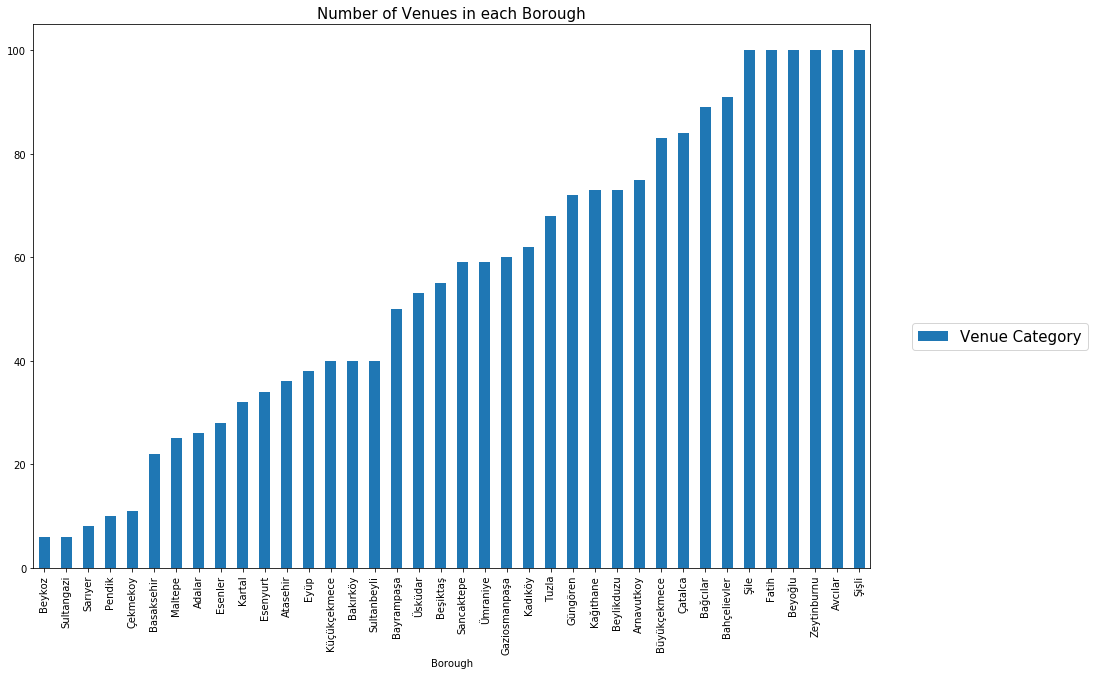

In [50]:
df.plot(kind ='bar',figsize=(15,10))
plt.title('Number of Venues in each Borough', fontsize=15)
plt.legend(fontsize = 15, loc=(1.05, 0.4))

In [51]:
address = 'Şile ,Istanbul'

geolocator = Nominatim(user_agent="ny_explorer")
locationŞile = geolocator.geocode(address)
latitudeŞile = locationŞile.latitude
longitudeŞile = locationŞile.longitude
print('The geograpical coordinate of Şile are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Şile are 41.0096334, 28.9651646.
